# Preparing Data and stuff

In [12]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
# for ML
# Load libraries
from sklearn.neural_network import MLPRegressor
sb.set() # set the default Seaborn style for graphics

#set Data
data_url = "https://s3.amazonaws.com/happiness-report/2018/WHR2018Chapter2OnlineData.xls"
#data = pd.read_excel("WHR2018Chapter2OnlineData.xls", sheet_name = 'Table2.1')
data = pd.read_excel(data_url, sheet_name = 'Table2.1')
#Dropping Un-necessary columns
data = data.drop(['country', 'year', 'Life Ladder','Positive affect','Negative affect','Delivery Quality',
                  'Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year',
                  'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15'], axis = 1)
data = data.dropna()
data.describe()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Democratic Quality,"gini of household income reported in Gallup, by wp5-year"
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,9.213109,0.810271,62.527350,0.732478,0.001674,0.758895,0.474923,-0.055492,0.444600
std,1.173291,0.121495,7.974400,0.141089,0.163605,0.181883,0.191202,0.869380,0.105390
min,6.377396,0.290184,40.076595,0.303540,-0.322952,0.035198,0.084061,-2.132233,0.244813
25%,8.261188,0.746565,56.757257,0.636202,-0.112965,0.702409,0.328074,-0.716873,0.368424
50%,9.429125,0.834688,64.214844,0.751613,-0.023188,0.812859,0.455871,-0.136583,0.425157
75%,10.158921,0.906644,68.879807,0.842927,0.095227,0.881930,0.609281,0.736466,0.504293
max,11.670484,0.987343,76.268028,0.979937,0.666991,0.983276,0.993604,1.540097,0.961435


# Heat map

Here we can find out which variables has high co-relation with each other

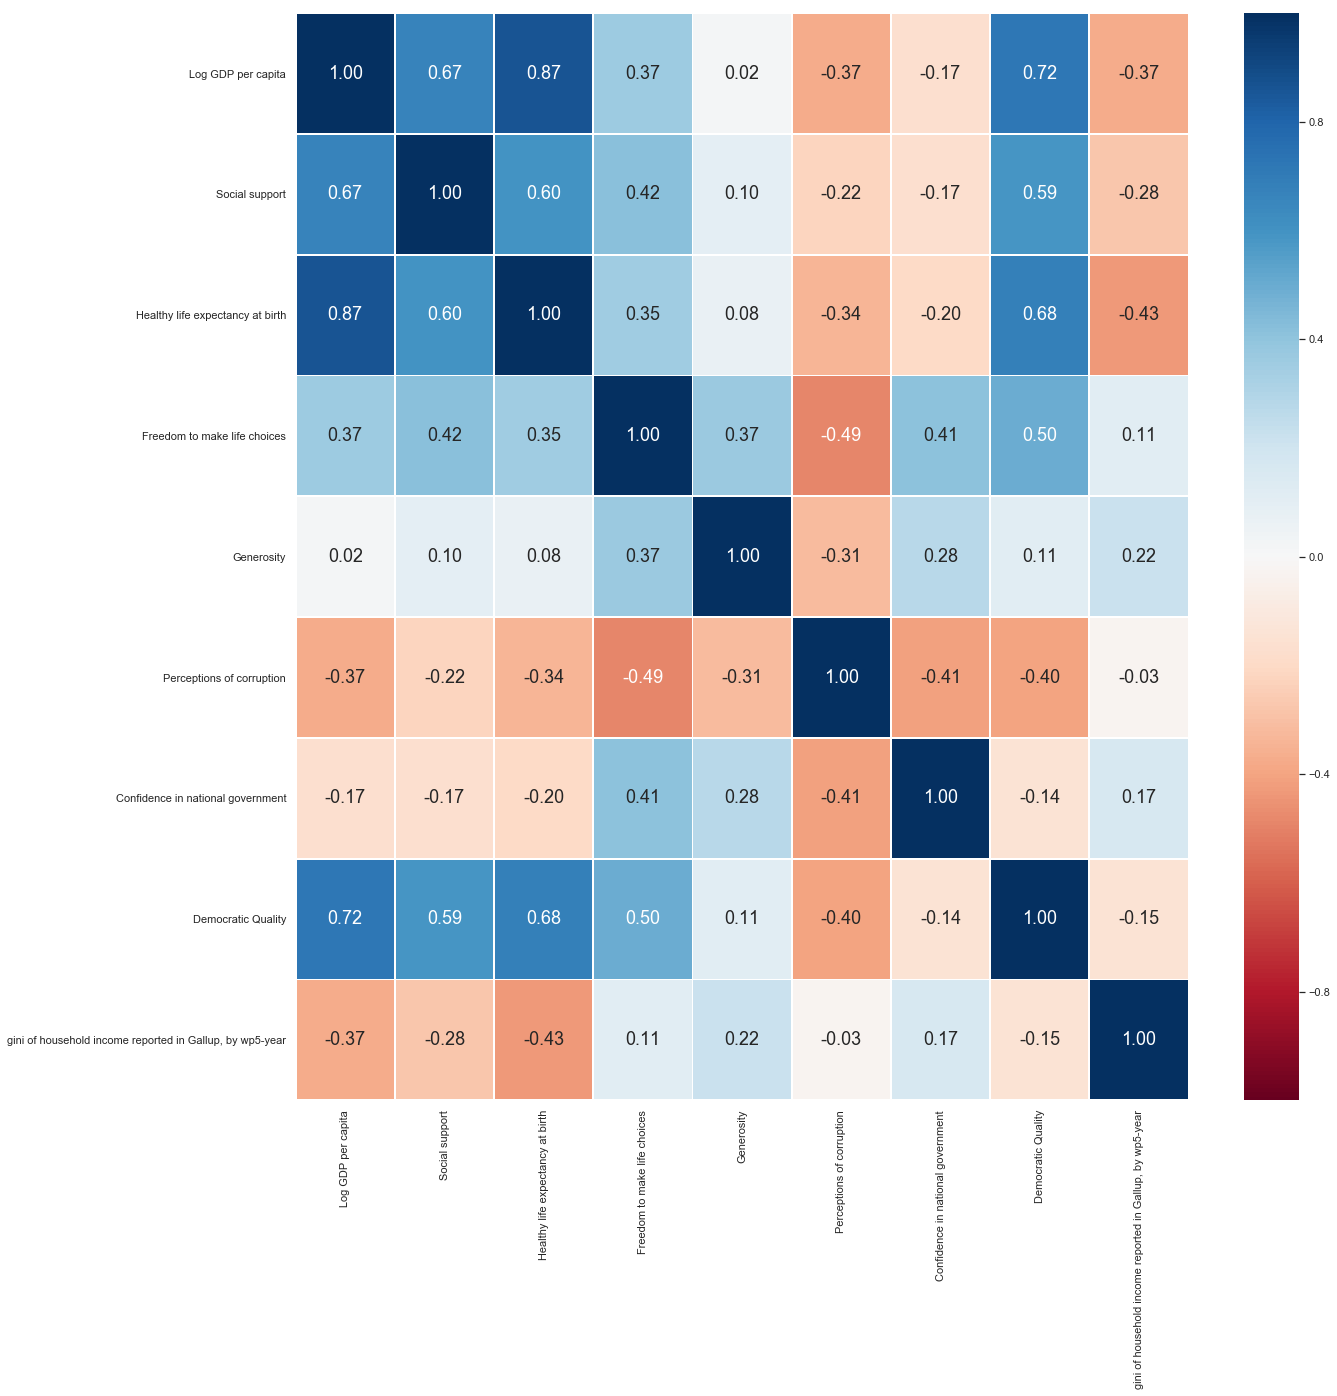

In [4]:
#Looking at Heat Map, see which variables has high co-relation with each other
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

As we can see, Log GSP per capita has high co-relation with Democratic Quality, Healthy life expentacy at birth, and Social Support

Next, We declare a function to do linear regression as we will be doing it lots of times

In [5]:
# Define function for linear regression
def mlinearRegress(X,y,test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    print()

    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
    boxplot_data1 = pd.DataFrame(y_train)
    boxplot_data1["Predicted"] = y_train_pred
    
    boxplot_data2 = pd.DataFrame(y_test)
    boxplot_data2["Predicted"] = y_test_pred
    
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    sb.boxplot(data = boxplot_data1, ax=axes[0])
    sb.boxplot(data = boxplot_data2, ax=axes[1])
    plt.show()

# Linear Regression Time!
Doing linear Regression with GDP vs Social Support, Life expectancy and Democratic Quality

Intercept of Regression 	: b =  [1.81448611]
Coefficients of Regression 	: a =  [[1.81362237 0.09502008 0.2320538 ]]

                         Predictors  Coefficients
0                    Social support      1.813622
1  Healthy life expectancy at birth      0.095020
2                Democratic Quality      0.232054



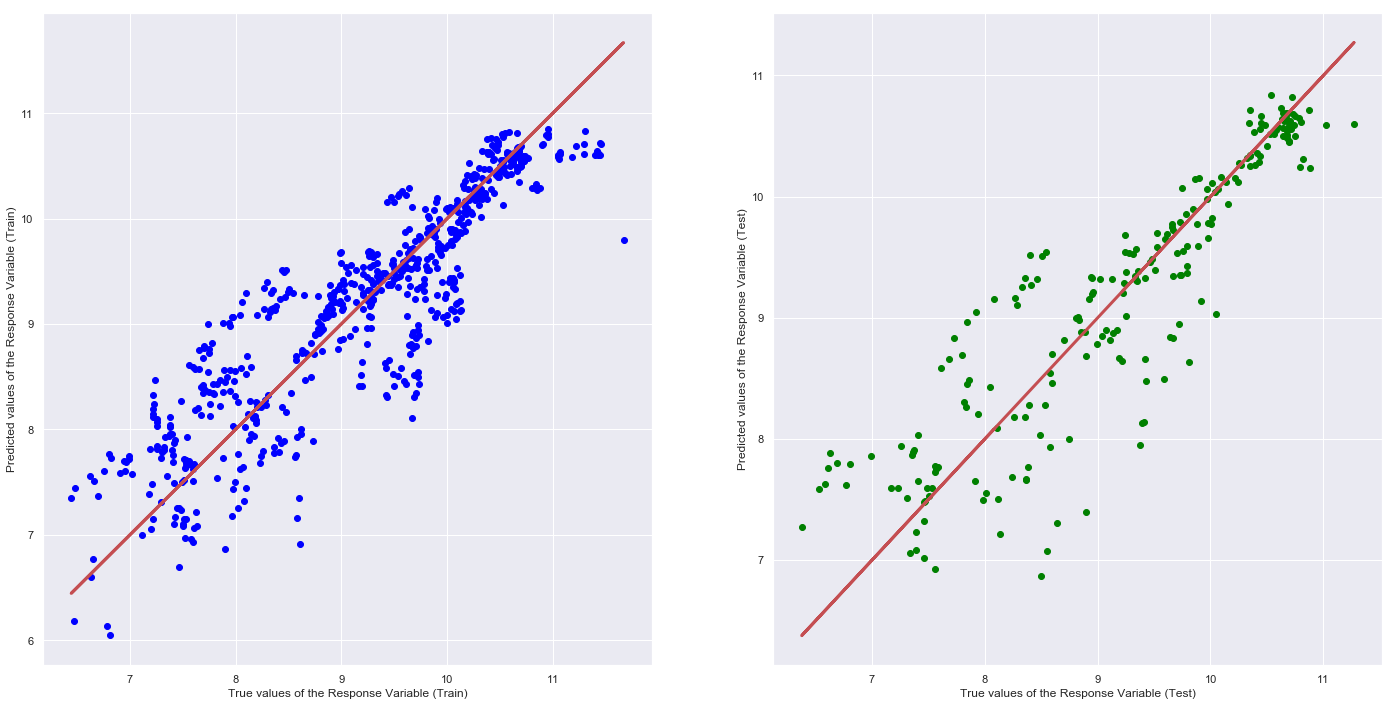

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.802754703441131
Mean Squared Error (MSE) 	: 0.268289749332458

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8025290192508527
Mean Squared Error (MSE) 	: 0.2800923973798014



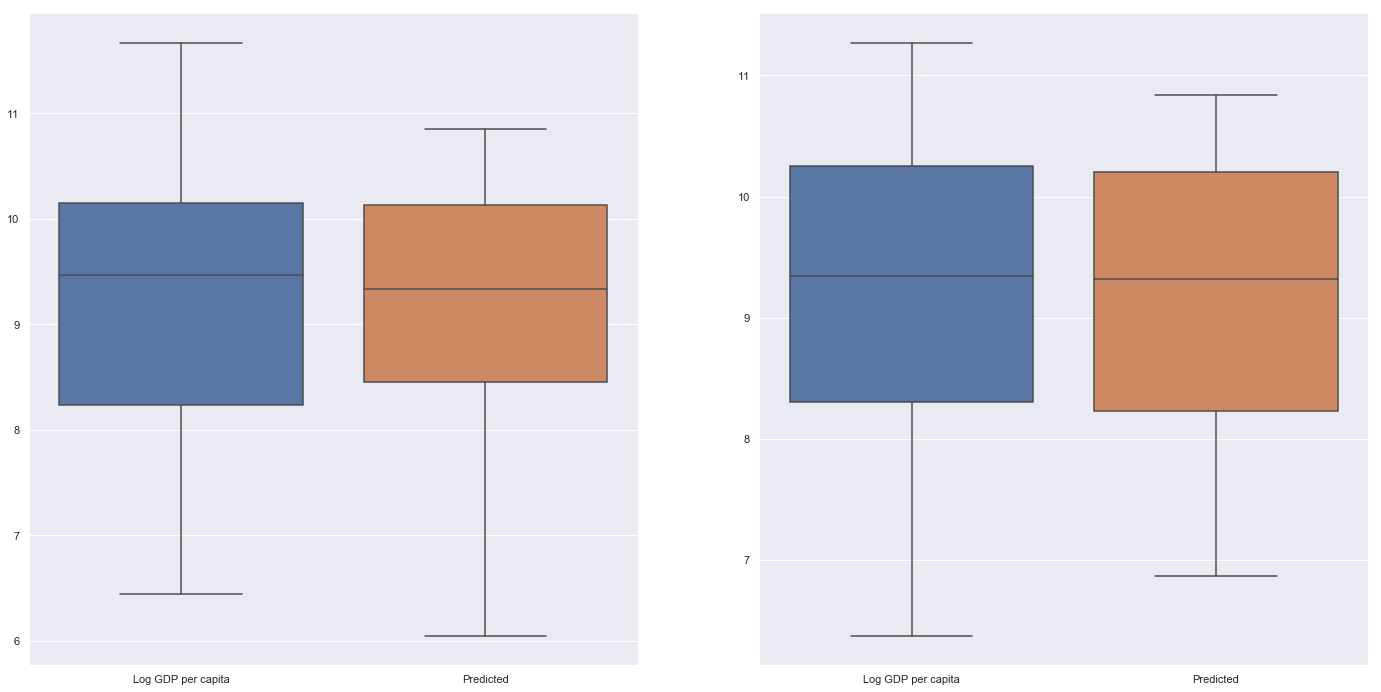

In [6]:
y = pd.DataFrame(data["Log GDP per capita"])
X = pd.DataFrame(data[["Social support", "Healthy life expectancy at birth", "Democratic Quality"]])
mlinearRegress(X,y)

# Linear Regression is a good start
but can we do better with Machine Learning?

# Multilayer perceptron Neural Network
here we try to predict GDP using the same variables but with an MLP model instead!

In [15]:
# Split-out validation dataset
mdata = data[["Log GDP per capita","Social support", "Healthy life expectancy at birth", "Democratic Quality"]]
array = mdata.values
X = array[:,1:4]
Y = array[:,0]
validation_size = 0.20
seed = 777
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [21]:
def doReg(layers, m_ax = 0):
    clf = MLPRegressor(solver='lbfgs', 
                       alpha=1e-2, 
                       hidden_layer_sizes=layers, 
                       learning_rate='adaptive',
                       max_iter=100000,
                       #verbose=True,
                       random_state=seed)
    clf.fit(X_train,Y_train)
    #clf.fit(X,Y)
    preds = clf.predict(X_validation)
    if (m_ax == 0):
        m_ax = plt
    m_ax.scatter(Y_validation, preds)
    m_ax.xlabel("Actual Value")
    m_ax.ylabel("Predicted Value")
    m_ax.show()
    # Check the Goodness of Fit (on Test Data)
    #print("Goodness of Fit of ML \tTest Dataset")
    #print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_validation, preds))
    #print()
    return mean_squared_error(Y_validation, preds), clf.score(X_validation, Y_validation)

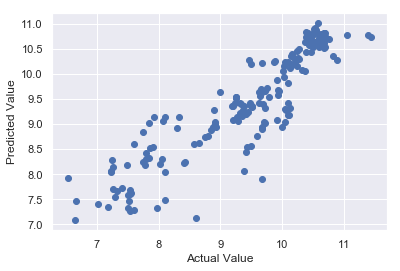

Layer:  10 (Length) x 20 (Height), MSE:  0.25347890077643276 , R^2:  0.8110369772152206


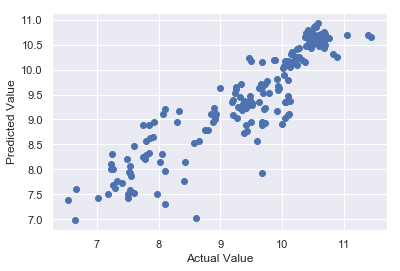

Layer:  11 (Length) x 20 (Height), MSE:  0.2402736170371052 , R^2:  0.8208812298313973


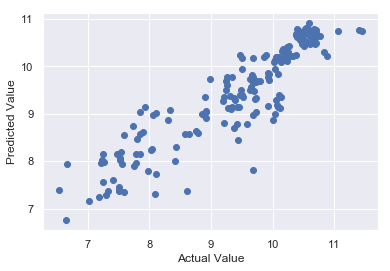

Layer:  12 (Length) x 20 (Height), MSE:  0.22571826267558168 , R^2:  0.8317319308145256


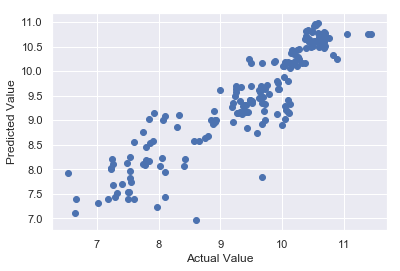

Layer:  13 (Length) x 20 (Height), MSE:  0.22899230900325093 , R^2:  0.8292912002885579


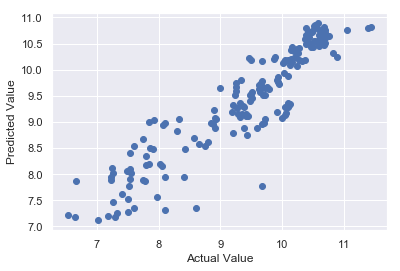

Layer:  14 (Length) x 20 (Height), MSE:  0.20485198625535586 , R^2:  0.8472872873138277


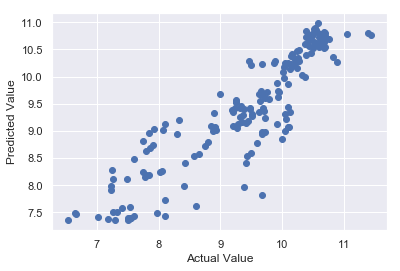

Layer:  15 (Length) x 20 (Height), MSE:  0.24314833623492155 , R^2:  0.8187381890196656


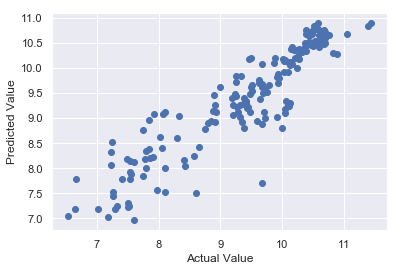

Layer:  16 (Length) x 20 (Height), MSE:  0.21161078996042723 , R^2:  0.8422487457444617


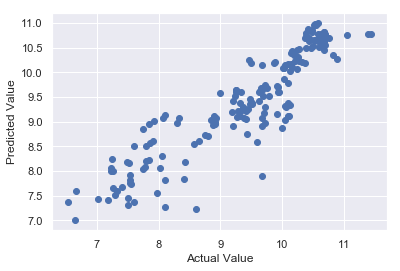

Layer:  17 (Length) x 20 (Height), MSE:  0.22724318737850208 , R^2:  0.830595132522832


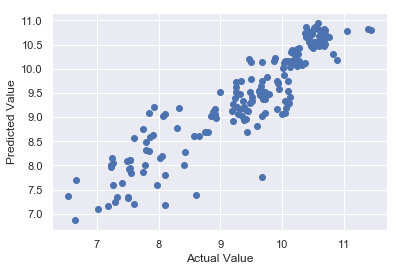

Layer:  18 (Length) x 20 (Height), MSE:  0.21554436187821238 , R^2:  0.8393163531956176


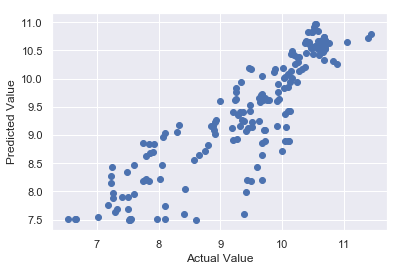

Layer:  19 (Length) x 20 (Height), MSE:  0.30042482719688207 , R^2:  0.7760398072864139


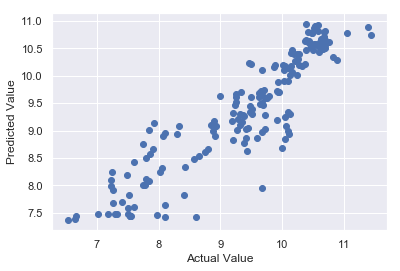

Layer:  20 (Length) x 20 (Height), MSE:  0.2231311183568219 , R^2:  0.8336605907911778


In [23]:
#f, axes = plt.subplots(5, 5, figsize=(24, 12))
k = 0
for i in range (9, 20):
    layers = ()
    for j in range(0, i+1):
        layers += (20,)
    mse, r2 = doReg(layers)
    k += 1
    print("Layer: ", i+1, "(Length) x", 20, "(Height), MSE: ", mse, ", R^2: ", r2)

### We're doing as good with Linear Regression, but with MLP 
No matter the layer settings, the MSE never goes below 0.2 and the R^2 never goes above 0.8.

Lets not give up. Time to try Random Forest
# Random Forest

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


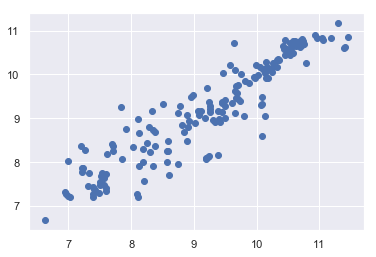

Mean Absolute Error: 0.3150402738111561
Mean Squared Error: 0.20746823502705078
Root Mean Squared Error: 0.4554868110352382
R^2: 0.8596994533630935


In [13]:
#Setting up data
x = pd.DataFrame(data[["Social support", "Healthy life expectancy at birth", "Democratic Quality"]  ])
y = pd.DataFrame(data[["Log GDP per capita"]])
x1 = data.iloc[:,0:3].values
y1 = data.iloc[:,3].values
#Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Feature Scaling
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)
#Random Forest time
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R^2:', r2_score(y_test, y_pred)) 